#<centre> **House Price Prediction based on Postal Code, Number of Bedrooms and Bathrooms, Car Parking  and Property Type**</centre>

Detail on Data : https://www.kaggle.com/mihirhalai/sydney-house-prices

## 1. Download source data from Github

In [ ]:
!wget https://raw.githubusercontent.com/DLPY/Regression-Session-2/master/Data/SydneyHousePrices.csv

--2021-10-14 11:42:42--  https://raw.githubusercontent.com/DLPY/Regression-Session-1/master/Data/SydneyHousePrices.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11606169 (11M) [text/plain]
Saving to: ‘SydneyHousePrices.csv.3’

SydneyHousePrices.c 100%[===================>]  11.07M  --.-KB/s    in 0.07s   

2021-10-14 11:42:42 (159 MB/s) - ‘SydneyHousePrices.csv.3’ saved [11606169/11606169]



## 2. Import neccssary packages for performing EDA and Multiple regression

In [ ]:
# Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
%matplotlib inline
pd.set_option('display.max_colwidth', None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 3. Read data into pandas dataframe to perform data analysis, cleaning and transformation

In [ ]:
df = pd.read_csv('SydneyHousePrices.csv')

In [ ]:
df.head(5)

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house


In [ ]:
df.shape

(199504, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199504 entries, 0 to 199503
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        199504 non-null  object 
 1   Id          199504 non-null  int64  
 2   suburb      199504 non-null  object 
 3   postalCode  199504 non-null  int64  
 4   sellPrice   199504 non-null  int64  
 5   bed         199350 non-null  float64
 6   bath        199504 non-null  int64  
 7   car         181353 non-null  float64
 8   propType    199504 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 13.7+ MB


In [ ]:
round(df.describe(),2)

,Id,postalCode,sellPrice,bed,bath,car
count,199504.00,199504.00,1.995040e+05,199350.00,199504.00,181353.00
mean,99752.50,2196.38,1.269776e+06,3.52,1.89,1.94
std,57591.99,193.05,6.948239e+06,1.07,0.93,1.06
min,1.00,2000.00,1.000000e+00,1.00,1.00,1.00
25%,49876.75,2082.00,7.200000e+05,3.00,1.00,1.00
50%,99752.50,2144.00,9.850000e+05,3.00,2.00,2.00
75%,149628.25,2211.00,1.475000e+06,4.00,2.00,2.00
max,199504.00,4878.00,2.147484e+09,99.00,99.00,41.00


**From the above max - It shows the dataset has outliers and it needs to be removed.**

## 4. Choosing predictors and target variables for performing Multiple Regression

**Target and Source variables**

*   SellingPrice - Target Variable
*   Bed, Bath, Car, propType, postalCode  - Predictor Variables



In [ ]:
df_new = df[['postalCode', 'bed', 'bath', 'car', 'propType' , 'sellPrice']]

In [ ]:
df_new.propType.unique()

array(['house', 'townhouse', 'duplex/semi-detached', 'villa', 'other',
       'terrace', 'warehouse', 'acreage'], dtype=object)

In [ ]:
df_new.head(5)

,postalCode,bed,bath,car,propType,sellPrice
0,2107,4.0,2,2.0,house,1210000
1,2107,4.0,3,4.0,house,2250000
2,2107,3.0,3,2.0,house,2920000
3,2107,3.0,1,2.0,house,1530000
4,2107,5.0,4,4.0,house,8000000


Encoding the categorical variables - Change the text into numbers

In [ ]:
df_new['propType'] = df_new['propType'].astype('category').cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_new.propType.unique()

array([2, 5, 1, 6, 3, 4, 7, 0], dtype=int8)

In [ ]:
df_new.head(5)

,postalCode,bed,bath,car,propType,sellPrice
0,2107,4.0,2,2.0,2,1210000
1,2107,4.0,3,4.0,2,2250000
2,2107,3.0,3,2.0,2,2920000
3,2107,3.0,1,2.0,2,1530000
4,2107,5.0,4,4.0,2,8000000


In [ ]:
df_new.dtypes

postalCode      int64
bed           float64
bath            int64
car           float64
propType         int8
sellPrice       int64
dtype: object

In [ ]:
df_new.count()

postalCode    199504
bed           199350
bath          199504
car           181353
propType      199504
sellPrice     199504
dtype: int64

In [ ]:
df_new.replace(np.nan, 0)

,postalCode,bed,bath,car,propType,sellPrice
0,2107,4.0,2,2.0,2,1210000
1,2107,4.0,3,4.0,2,2250000
2,2107,3.0,3,2.0,2,2920000
3,2107,3.0,1,2.0,2,1530000
4,2107,5.0,4,4.0,2,8000000
...,...,...,...,...,...,...
199499,2234,5.0,3,7.0,2,1900000
199500,2234,4.0,3,2.0,2,980000
199501,2234,4.0,2,2.0,2,850000
199502,2234,3.0,2,2.0,5,640000


## 5. Remove outliers in the data

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
df_no_outlier_bed=remove_outlier(df_new, 'bed').reset_index(drop=True)
df_no_outlier_bath=remove_outlier(df_no_outlier_bed, 'bath').reset_index(drop=True)
df_no_outlier_car=remove_outlier(df_no_outlier_bath, 'car').reset_index(drop=True)
df_no_outlier=remove_outlier(df_no_outlier_car, 'sellPrice').reset_index(drop=True)

In [ ]:
df_no_outlier

,postalCode,bed,bath,car,propType,sellPrice
0,2107,4.0,2,2.0,2,1210000
1,2107,3.0,1,2.0,2,1530000
2,2107,4.0,2,2.0,2,1610000
3,2107,3.0,1,2.0,2,1510000
4,2107,3.0,1,2.0,2,1400000
...,...,...,...,...,...,...
151565,2234,5.0,2,2.0,2,1220000
151566,2234,5.0,3,3.0,2,1415000
151567,2234,4.0,3,2.0,2,980000
151568,2234,4.0,2,2.0,2,850000


In [ ]:
corr = df_no_outlier.corr()

In [ ]:
corr

,postalCode,bed,bath,car,propType,sellPrice
postalCode,1.000000,0.054281,-0.084662,0.004350,-0.029208,-0.426086
bed,0.054281,1.000000,0.585443,0.313054,-0.302399,0.288013
bath,-0.084662,0.585443,1.000000,0.295254,-0.073183,0.325798
car,0.004350,0.313054,0.295254,1.000000,-0.077036,0.183861
propType,-0.029208,-0.302399,-0.073183,-0.077036,1.000000,-0.207196
sellPrice,-0.426086,0.288013,0.325798,0.183861,-0.207196,1.000000


## 6. Correlation heatmap with the mask and correct aspect ratio

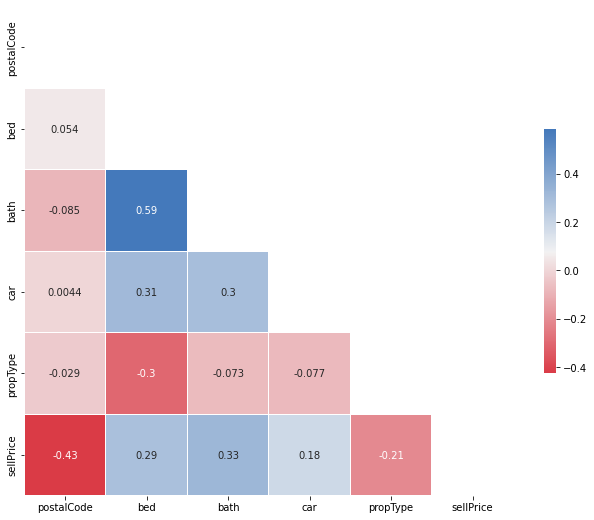

In [ ]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 250, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=.2, cbar_kws={'shrink': .5}, ax=ax, annot=True)

## 7. Split Target and Predictor Variables to different dataframes

In [ ]:
X = df_no_outlier.iloc[:,:-1]
Y = df_no_outlier.iloc[:,5]

In [ ]:
X.head(5)

,postalCode,bed,bath,car,propType
0,2107,4.0,2,2.0,2
1,2107,3.0,1,2.0,2
2,2107,4.0,2,2.0,2
3,2107,3.0,1,2.0,2
4,2107,3.0,1,2.0,2


In [ ]:
Y.head(5)

0    1210000
1    1530000
2    1610000
3    1510000
4    1400000
Name: sellPrice, dtype: int64

Convert dataframes to values to feed into Model

In [ ]:
X = X.values
Y= Y.values

In [ ]:
print('Number of records and predictor variables:', X.shape)
print('Number of records and target variable:', Y.shape)

Number of records and predictor variables: (151570, 5)
Number of records and target variable: (151570,)


## 8. Split dataset into the training and test using train_set_split: 90% - train and 10% - test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.1, random_state=23)

In [ ]:
print ('Training Data:',X_train.shape, Y_train.shape)
print ('Testing Data:',X_test.shape, Y_test.shape)

Training Data: (136413, 5) (136413,)
Testing Data: (15157, 5) (15157,)


## 9. Train, Test and Predict using regression model

In [ ]:
Regression = sm.OLS(endog = Y, exog = X).fit()

In [ ]:
print(Regression.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.849
Method:                 Least Squares   F-statistic:                          1.705e+05
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                        0.00
Time:                        12:15:51   Log-Likelihood:                     -2.1849e+06
No. Observations:              151570   AIC:                                  4.370e+06
Df Residuals:                  151565   BIC:                                  4.370e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

###To read more on skewness, kurtosis, autocorrelation and multicollinearity.

---
https://www.sciencedirect.com/topics/neuroscience/kurtosis 

---
https://www.investopedia.com/terms/d/durbin-watson-statistic.asp 

---
https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity

Create an object called regressor in the LinearRegression class

In [ ]:
regressor = LinearRegression()

Fit the linear regression model to the training set. We use the fit method the arguments of the fit method will be training sets

In [ ]:
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Regression Coefficients

In [ ]:
print('Coefficients: ', regressor.coef_)

Coefficients:  [  -994.96779086  77688.21115481 119308.77799992  59036.23018905
 -63602.96035562]


Predicting the Test set results

In [ ]:
Y_pred= regressor.predict(X_test)

## 10. Evaluation metrics - How to Calculate R-Square and RMSE

In [ ]:
coefficient_of_dermination = r2_score(Y_test,Y_pred)
print('R-squared:',coefficient_of_dermination)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error: {}'.format(rmse))

R-squared: 0.32234350141727486
Root Mean Squared Error: 375498.5323613452


## 11. Plot for residual error 

In [ ]:
plt.style.use('seaborn')

Plotting residual errors in training data

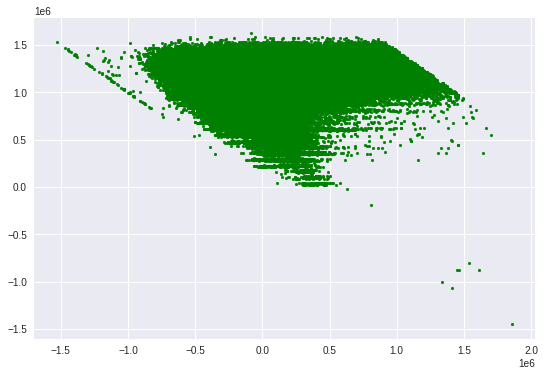

In [ ]:
residual_train = Y_train - regressor.predict(X_train) 
plt.scatter(residual_train,regressor.predict(X_train),
            color = 'green', s = 8, label = 'Train data')

Plotting residual errors in test data

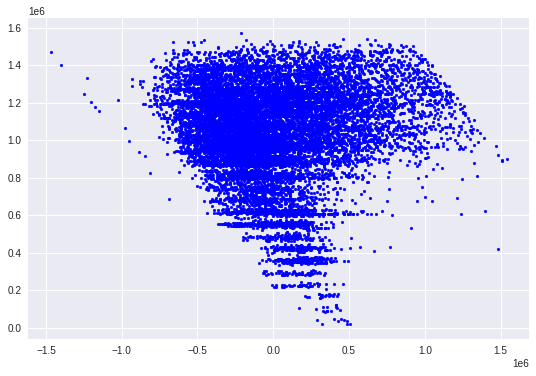

In [ ]:
residual_test = Y_test-regressor.predict(X_test)
plt.scatter(residual_test,regressor.predict(X_test),
            color = 'blue', s = 8, label = 'Test data')

Plotting line for zero residual error and legend and title

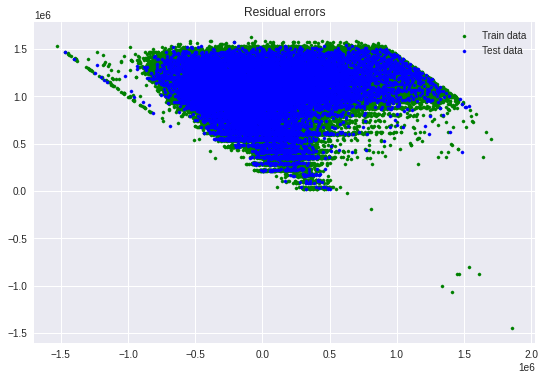

In [ ]:
plt.scatter(residual_train, regressor.predict(X_train),
            color = 'green', s = 10, label = 'Train data')
plt.scatter(residual_test,regressor.predict(X_test),
            color = 'blue', s = 10, label = 'Test data')
plt.hlines(y=0 , xmin = 0, xmax = 100, linewidth = 5)
plt.legend(loc = 'upper right')
plt.title('Residual errors')
plt.rc('font', size=12)   
plt.show()